In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

<ErrorbarContainer object of 3 artists>

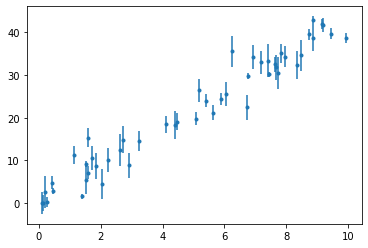

In [3]:
numpoints = 50
np.random.seed(seed=5496)

x = np.random.uniform(0.0,10.0,numpoints)
y = 4.0*x + 2.0 + np.random.normal(0.0,4.0,numpoints)
y_err = np.random.uniform(0.5,4.0,numpoints)

plt.errorbar(x,y,y_err,fmt='.')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope]
Sampling 4 chains: 100%|██████████| 84000/84000 [00:27<00:00, 3106.58draws/s]


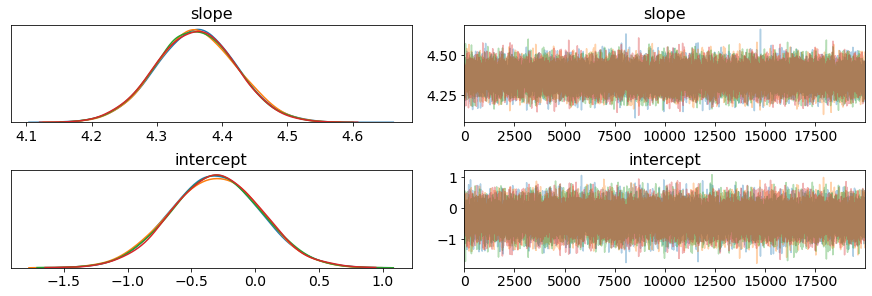

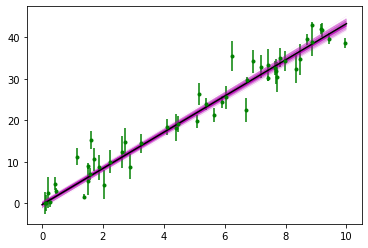

In [4]:
with pm.Model() as model:
    m = pm.Uniform('slope',-10,10)
    d = pm.Uniform('intercept',-10,10)
    theta = pm.Normal('Y',m*x+d,sd=y_err,observed=y)
    trace = pm.sample(20000,tune=1000)
    
pm.traceplot(trace)
plt.figure()

plt.errorbar(x,y,y_err,fmt='.g')

x_model = np.arange(0,11)


for i in range(200):
    slope_draw = np.random.choice(trace['slope'],1)
    intercept_draw = np.random.choice(trace['intercept'],1)
    y_draw = x_model*slope_draw + intercept_draw
    plt.plot(x_model,y_draw,'-m',lw=0.1,alpha=0.4)
    
y_model = x_model*np.median(trace['slope']) + np.median(trace['intercept'])
plt.plot(x_model,y_model,'-k')

100%|██████████| 5000/5000 [00:03<00:00, 1311.26it/s]


PPC p-value: 0.4986


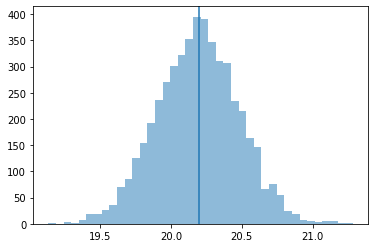

In [5]:
ppc = pm.sample_posterior_predictive(trace, samples=5000, model=model)

ppc_means = np.array([np.average(ppc_y,weights=y_err**-2) for ppc_y in ppc['Y']])

plt.hist(ppc_means, bins=40, alpha=0.5)
plt.axvline(np.average(y,weights=y_err**-2))

print('PPC p-value:',len(ppc_means[ppc_means > np.average(y,weights=y_err**-2)])/len(ppc_means))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, a]
Sampling 4 chains: 100%|██████████| 84000/84000 [00:28<00:00, 2992.61draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


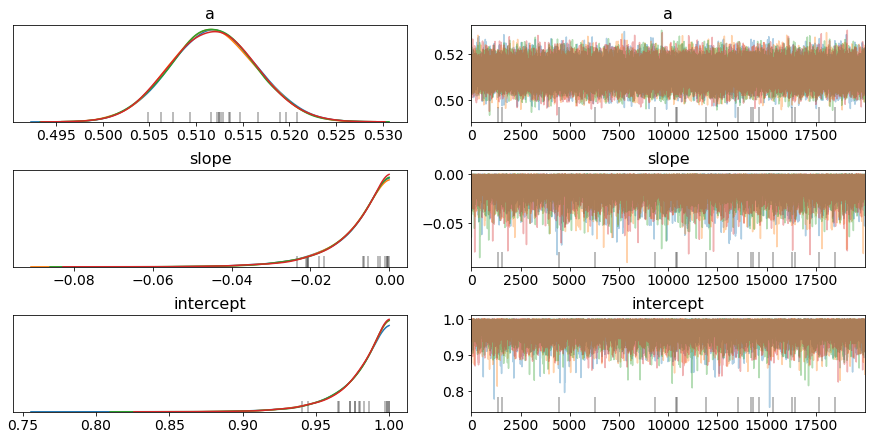

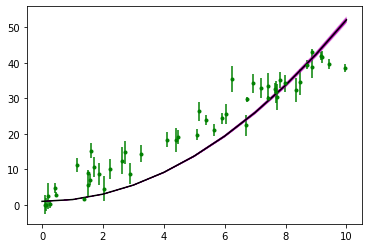

In [6]:
with pm.Model() as model:
    a = pm.Uniform('a',-10,10)
    m = pm.Uniform('slope',-10,0)
    d = pm.Uniform('intercept',-10,1)
    theta = pm.Normal('Y',a*x**2+m*x+d,sd=y_err,observed=y)
    trace = pm.sample(20000,tune=1000)
    
pm.traceplot(trace)
plt.figure()

plt.errorbar(x,y,y_err,fmt='.g')

x_model = np.arange(0,11)


for i in range(200):
    a_draw = np.random.choice(trace['a'],1)
    slope_draw = np.random.choice(trace['slope'],1)
    intercept_draw = np.random.choice(trace['intercept'],1)
    y_draw = a_draw*x_model**2 + x_model*slope_draw + intercept_draw
    plt.plot(x_model,y_draw,'-m',lw=0.1,alpha=0.4)
    
y_model = np.median(trace['a'])*x_model**2 + x_model*np.median(trace['slope']) + np.median(trace['intercept'])
plt.plot(x_model,y_model,'-k')

100%|██████████| 5000/5000 [00:04<00:00, 1211.56it/s]


PPC p-value: 0.0


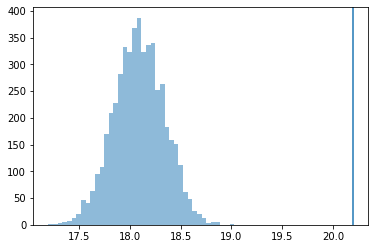

In [7]:
ppc = pm.sample_posterior_predictive(trace, samples=5000, model=model)

ppc_means = np.array([np.average(ppc_y,weights=y_err**-2) for ppc_y in ppc['Y']])

plt.hist(ppc_means, bins=40, alpha=0.5)
plt.axvline(np.average(y,weights=y_err**-2))

print('PPC p-value:',len(ppc_means[ppc_means > np.average(y,weights=y_err**-2)])/len(ppc_means))